In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
data = pd.read_csv(r"C:\Users\DELL\Downloads\HomeTest1.csv")

In [ ]:
data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,"71,49","$53,62",41245.0
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,"2091,47","$388,92",41701.0
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,"1793,43","$248,82",36361.0
3,4,88,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,"1198,46","$381,10",36145.0
4,5,78,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,"1765,3","$709,48",42226.0


In [ ]:
data.dtypes

transaction_id               int64
product_id                   int64
customer_id                  int64
transaction_date            object
online_order                object
order_status                object
brand                       object
product_line                object
product_class               object
product_size                object
list_price                  object
standard_cost               object
product_first_sold_date    float64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  object 
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 2.0+ MB


In [ ]:
Approved = data['order_status'] == 'Approved'
df = data[Approved]
df = df.drop_duplicates()
df = df.dropna(subset=['customer_id'])
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,"71,49","$53,62",41245.0
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,"2091,47","$388,92",41701.0
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,"1793,43","$248,82",36361.0
3,4,88,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,"1198,46","$381,10",36145.0
4,5,78,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,"1765,3","$709,48",42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,24/06/2017,True,Approved,OHM Cycles,Standard,high,medium,"2005,66","$1.203,40",37823.0
19996,19997,41,127,09/11/2017,True,Approved,Solex,Road,medium,medium,"416,98","$312,74",35560.0
19997,19998,87,2284,14/04/2017,True,Approved,OHM Cycles,Standard,medium,medium,"1636,9","$44,71",40410.0
19998,19999,6,2764,03/07/2017,False,Approved,OHM Cycles,Standard,high,medium,"227,88","$136,73",38216.0


In [ ]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [ ]:
df["transaction_date"] = pd.to_datetime(df["transaction_date"], format="%d/%m/%Y")
df['order_month'] = df['transaction_date'].apply(get_month)
customer_group = df.groupby('customer_id')['order_month']
df['CohortMonth'] = customer_group.transform('min')
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,order_month,CohortMonth
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,"71,49","$53,62",41245.0,2017-02-01,2017-02-01
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,"2091,47","$388,92",41701.0,2017-05-01,2017-01-01
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,"1793,43","$248,82",36361.0,2017-10-01,2017-01-01
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,"1198,46","$381,10",36145.0,2017-08-01,2017-02-01
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,"1765,3","$709,48",42226.0,2017-10-01,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,"2005,66","$1.203,40",37823.0,2017-06-01,2017-01-01
19996,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,"416,98","$312,74",35560.0,2017-11-01,2017-01-01
19997,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,"1636,9","$44,71",40410.0,2017-04-01,2017-04-01
19998,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,"227,88","$136,73",38216.0,2017-07-01,2017-02-01


In [ ]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

transaction_year, transaction_month, _ = get_date_int(df, 'order_month')
cohort_year, cohort_month, _ = get_date_int(df, 'CohortMonth')

In [ ]:
years_diff = transaction_year - cohort_year
months_diff = transaction_month - cohort_month
df['CohortIndex'] = years_diff * 12 + months_diff  + 1
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,order_month,CohortMonth,CohortIndex
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,"71,49","$53,62",41245.0,2017-02-01,2017-02-01,1
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,"2091,47","$388,92",41701.0,2017-05-01,2017-01-01,5
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,"1793,43","$248,82",36361.0,2017-10-01,2017-01-01,10
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,"1198,46","$381,10",36145.0,2017-08-01,2017-02-01,7
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,"1765,3","$709,48",42226.0,2017-10-01,2017-01-01,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,"2005,66","$1.203,40",37823.0,2017-06-01,2017-01-01,6
19996,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,"416,98","$312,74",35560.0,2017-11-01,2017-01-01,11
19997,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,"1636,9","$44,71",40410.0,2017-04-01,2017-04-01,1
19998,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,"227,88","$136,73",38216.0,2017-07-01,2017-02-01,6


In [ ]:
Customer_group = df.groupby(['CohortMonth', 'CohortIndex'])

cohort_data = Customer_group['customer_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns ='CohortIndex',
                                 values = 'customer_id')

In [ ]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [ ]:
retention.index = retention.index.strftime('%Y-%m')
retention.index

Index(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='object', name='CohortMonth')

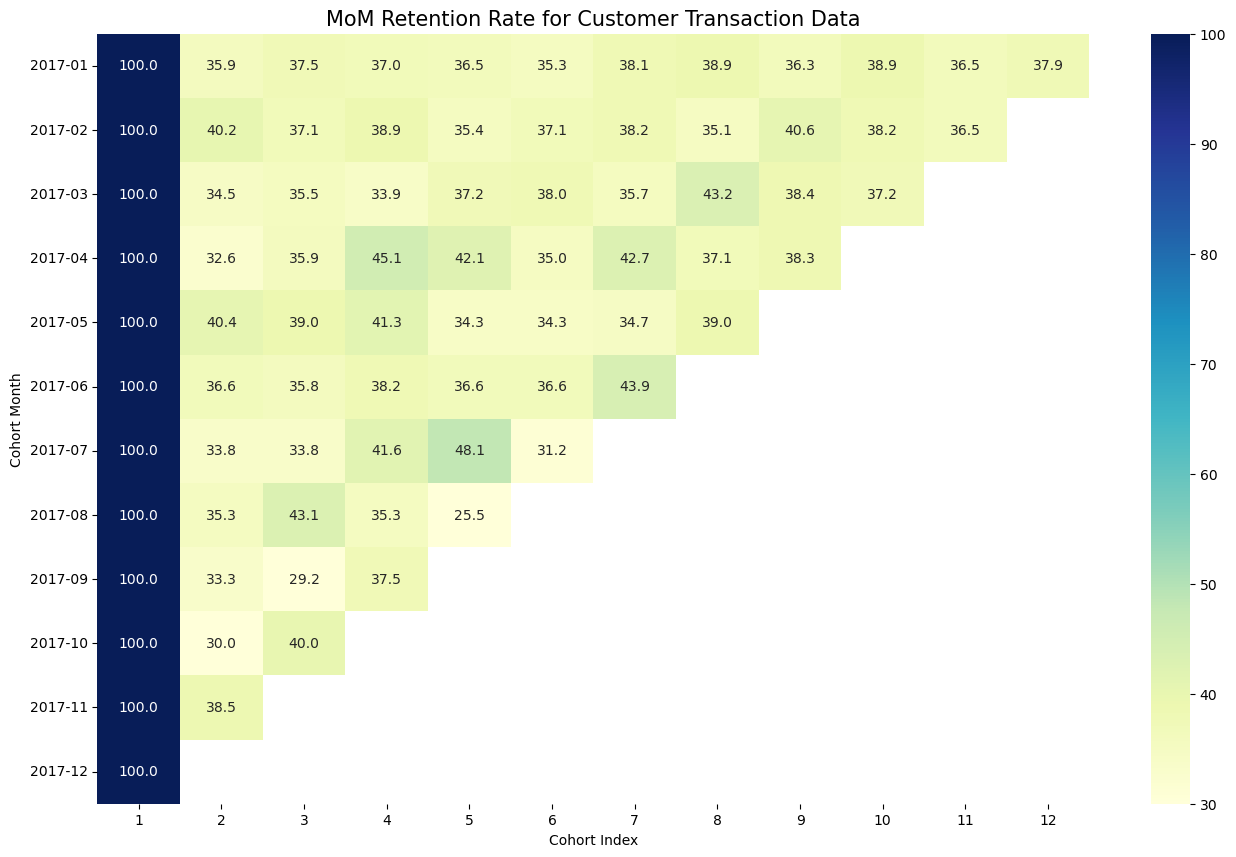

In [ ]:
plt.figure(figsize=(16, 10))

plt.title('MoM Retention Rate for Customer Transaction Data', fontsize = 15)

sns.heatmap((retention*100).round(1), annot=True, fmt= '',cmap='YlGnBu', vmin = 30 , vmax = 100)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks(rotation=360)
plt.show()